In [1]:
import  matplotlib.pyplot as plt# is a visulization Library in python for 2d plots array
from matplotlib.figure import Figure 
import pandas as pd
import seaborn as sns#frovide 
import numpy as np


In [2]:
df = pd.read_csv('dataset_Facebook.csv',sep=';')
df.head(5)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
ts = df.groupby('Type')['share'].sum()
ts 

Type
Link        284.0
Photo     11461.0
Status     1414.0
Video       365.0
Name: share, dtype: float64

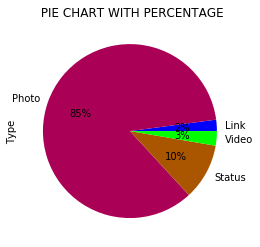

In [5]:
ts.plot.pie(label=('Type'), title = " PIE CHART WITH PERCENTAGE",colormap='brg', autopct='%1.0f%%')

In [7]:
ts = df.groupby('Type')['like'].sum()
ts

Type
Link       1613.0
Photo     77610.0
Status     7952.0
Video      1620.0
Name: like, dtype: float64

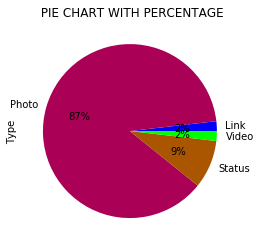

In [8]:
ts.plot.pie(label=('Type'), title = " PIE CHART WITH PERCENTAGE",colormap='brg', autopct='%1.0f%%')

In [9]:
ts = pd.pivot_table(df, index=['Type'], columns=['Paid'], values=['share'], aggfunc='count')
ts

share     
Paid     0.0  1.0
Type             
Link      16    6
Photo    302  119
Status    35   10
Video      3    4

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000189437A5288>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

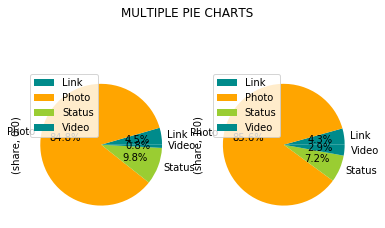

In [10]:
plt.figure(); 
ts.plot.pie(title='MULTIPLE PIE CHARTS', colors=['darkcyan','orange','yellowgreen'],autopct='%.1f%%', subplots=True) 

<function matplotlib.pyplot.show(*args, **kw)>

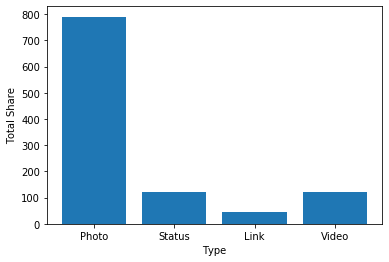

In [11]:
x=df['Type']
y=df['share']

#plotting the data

plt.bar(x,y)
#plt.title('Tips Data set')
plt.xlabel('Type')
plt.ylabel('Total Share')
plt.show

Posts per month

Text(0.5, 1.0, 'Number of posts for each month')

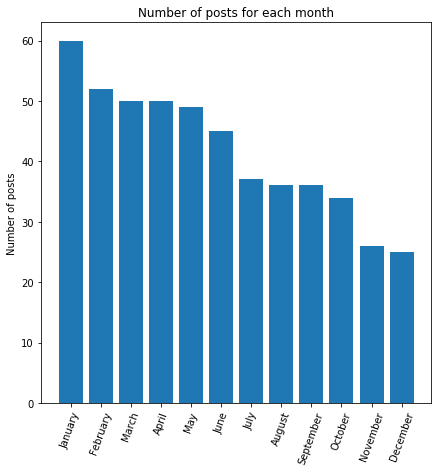

In [12]:
plt.figure(figsize=(7,7))

objects = ('January', 'February', 'March', 'April','May','June','July','August','September','October','November','December')
y_pos = np.arange(len(objects))

plt.bar(y_pos, df.loc[:,'Post Month'].value_counts().values)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title('Number of posts for each month')

.Posts per Weekday

Text(0.5, 1.0, 'Number of posts for each weekday')

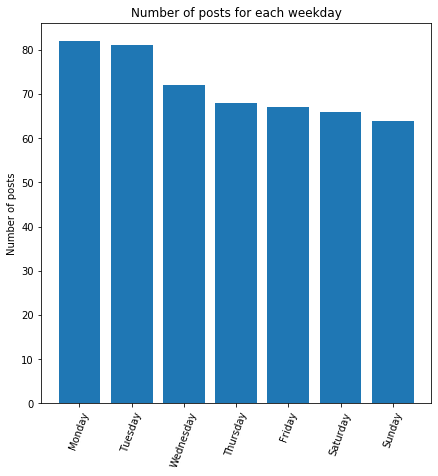

In [13]:
plt.figure(figsize=(7,7))

objects = ('Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday')
y_pos = np.arange(len(objects))

plt.bar(y_pos, df.loc[:,'Post Weekday'].value_counts().values)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title('Number of posts for each weekday')

In [14]:
Post paid or free per Month and per Weekday

SyntaxError: invalid syntax (<ipython-input-14-52025a979c73>, line 1)

Text(0.5, 1.0, 'Number of posts: Free vs Paid per Weekday')

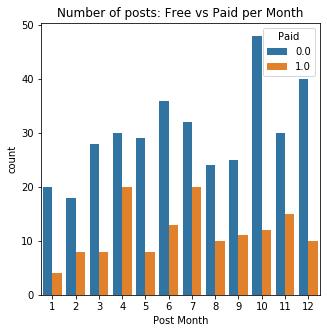

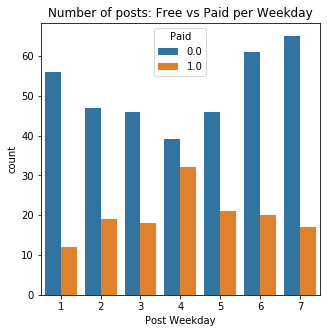

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x='Post Month',hue='Paid',data=df)
plt.title("Number of posts: Free vs Paid per Month")

plt.figure(figsize=(5,5)) 
sns.countplot(x='Post Weekday',hue='Paid',data=df)
plt.title("Number of posts: Free vs Paid per Weekday")

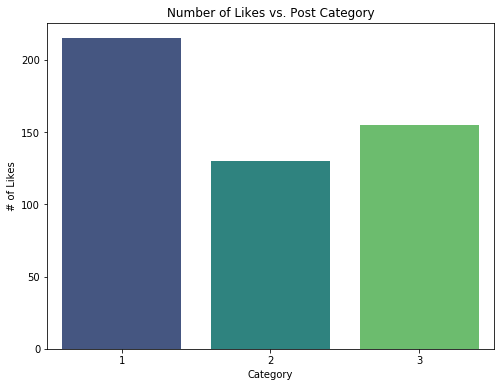

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x='Category',data=df,palette='viridis')
plt.ylabel("# of Likes")
plt.title("Number of Likes vs. Post Category")
plt.savefig('catCount.png', bbox_inches='tight')

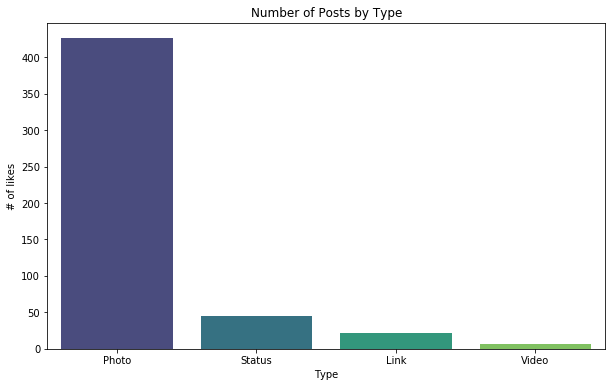

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='Type',data=df,palette='viridis')
plt.title("Number of Posts by Type")
plt.ylabel("# of likes")
plt.savefig('typeCount.png', bbox_inches='tight')

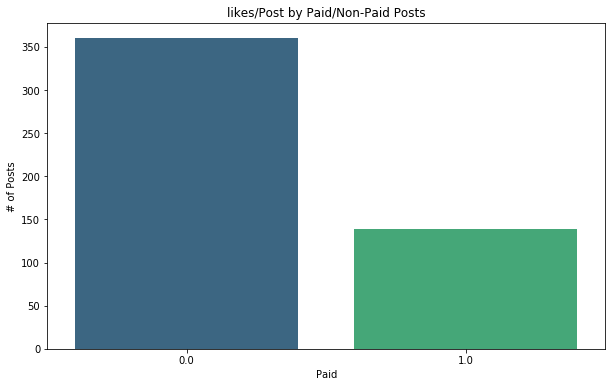

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='Paid',data=df,palette='viridis')
plt.title("likes/Post by Paid/Non-Paid Posts")
plt.ylabel("# of Posts")
plt.savefig('paidCount.png', bbox_inches='tight')

Text(0.5, 1.0, 'Distribution of Like/Post')

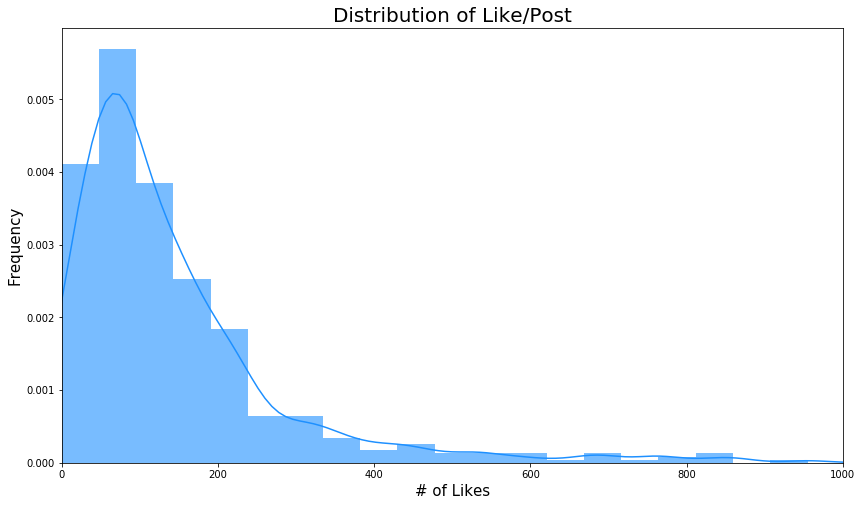

In [19]:
plt.figure(figsize=(14,8))
sns.distplot(df[df['like']<1000]['like'],bins=20,color='dodgerblue',hist_kws={'alpha':0.6})
plt.xlim(0,1000)
plt.xlabel("# of Likes",fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of Like/Post',fontsize=20)

Text(0.5, 1.0, 'Distribution of Total Page Likes')

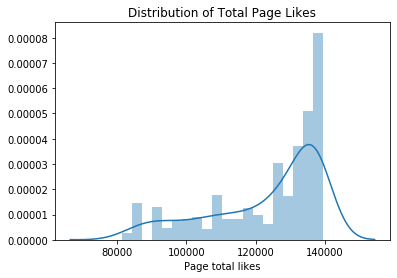

In [20]:
sns.distplot(df['Page total likes'],bins=20)
plt.title("Distribution of Total Page Likes")

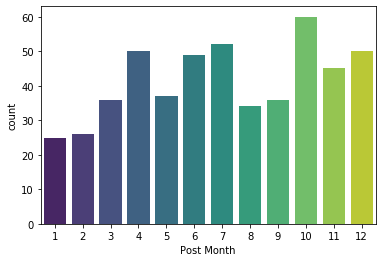

In [21]:
sns.countplot(df['Post Month'],palette='viridis')

Text(0, 0.5, 'Number of posts')

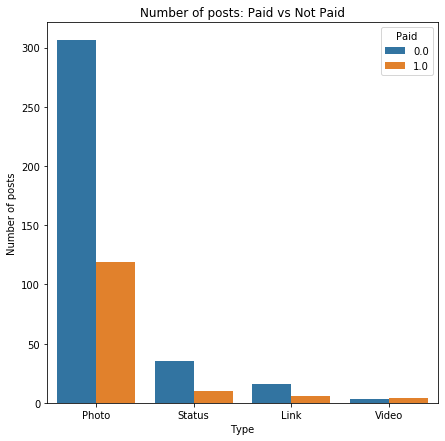

In [22]:
plt.figure(figsize=(7,7))

sns.countplot(x='Type',hue='Paid',data=df)
plt.title("Number of posts: Paid vs Not Paid")
plt.ylabel("Number of posts")

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, '# Page Likes vs. # Post Likes')

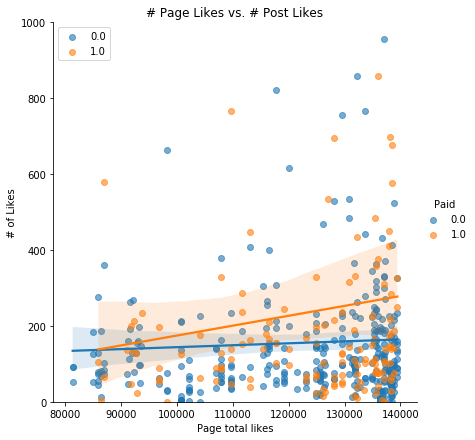

In [23]:
sns.lmplot(x='Page total likes',y='like',
           hue='Paid',data=df,fit_reg=True,
          scatter_kws={'alpha':0.6},size=(6))
plt.legend()
plt.ylim(0,1000)
plt.ylabel("# of Likes")
plt.title('# Page Likes vs. # Post Likes')

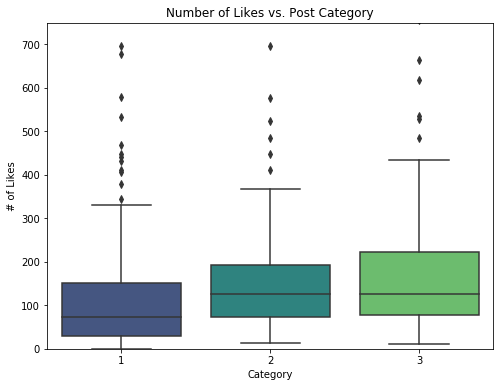

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Category'],y=df['like'],data=df,palette='viridis')
plt.ylim(0,750)
plt.ylabel("# of Likes")
plt.title("Number of Likes vs. Post Category")
plt.savefig('catBox.png', bbox_inches='tight')

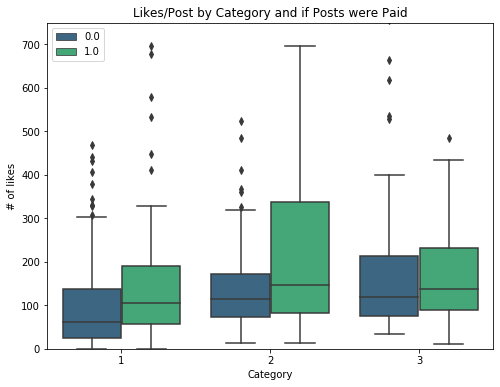

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Category',y='like',data=df,hue='Paid',palette='viridis')
plt.ylim(0,750)
plt.ylabel("# of likes")
plt.legend(loc='upper left')
plt.title("Likes/Post by Category and if Posts were Paid")
plt.savefig('catPaidCount.png', bbox_inches='tight')

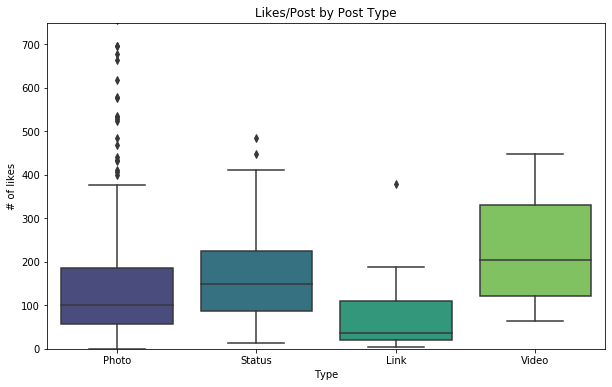

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Type',y='like',data=df,palette='viridis')
plt.ylim(0,750)
#sns.despine(offset=4,bottom=True)
plt.title("Likes/Post by Post Type")
plt.ylabel("# of likes")
#plt.legend(loc='upper left')
plt.savefig('typeBox.png', bbox_inches='tight')

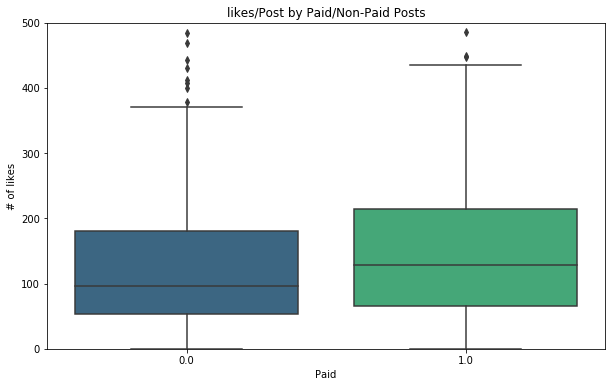

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Paid',y='like',data=df,palette='viridis')
plt.ylim(0,500)
#sns.despine(offset=4,bottom=True)
plt.title("likes/Post by Paid/Non-Paid Posts")
plt.ylabel("# of likes")
plt.savefig('paidBox.png', bbox_inches='tight')

Comments

Text(0.5, 1.0, 'Comments per post distribution')

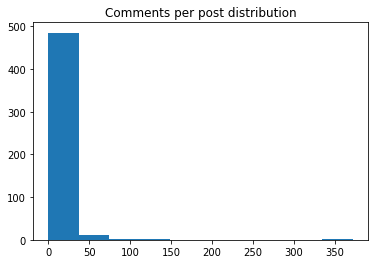

In [28]:
plt.hist(df.loc[:,'comment'])
plt.title("Comments per post distribution")

Likes

In [29]:
df.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [30]:
df = df.dropna(subset=['Paid'])

C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Likes per post distribution')

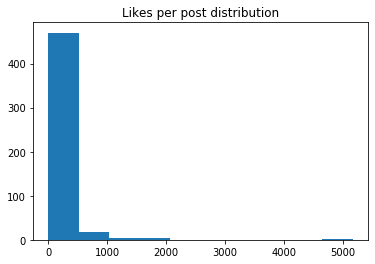

In [31]:
plt.hist(df.loc[:,'like'])
plt.title("Likes per post distribution")

Text(0.5, 1.0, 'Shares per post distribution')

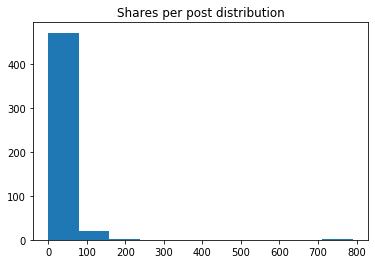

In [32]:
plt.hist(df.loc[:,'share'])
plt.title("Shares per post distribution")

Text(0.5, 1.0, 'Total pages likes')

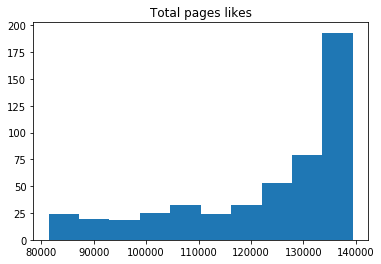

In [33]:
plt.hist(df.loc[:,'Page total likes'])
plt.title("Total pages likes")

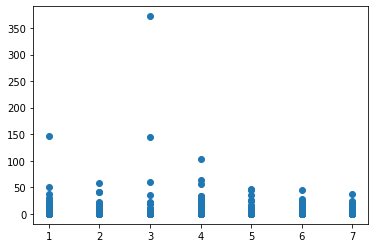

In [34]:
x=df['Post Weekday']
y=df['comment']
plt.scatter(x, y)

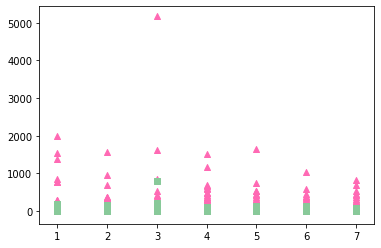

In [35]:
x=df['Post Weekday']
y=df['like']
plt.scatter(x, y, color = 'hotpink',marker ="^")
x=df['Post Weekday']
y=df['share']
plt.scatter(x, y,color = '#88c999',marker ="s")

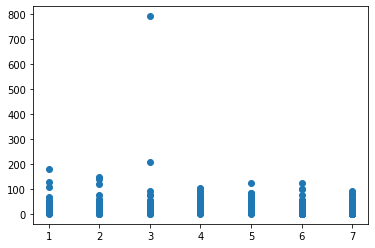

In [36]:
x=df['Post Weekday']
y=df['share']
plt.scatter(x, y)

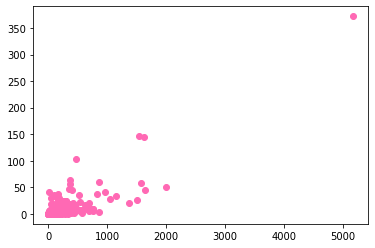

In [37]:
x=df['like']
y=df['comment']
plt.scatter(x, y,color = 'hotpink')

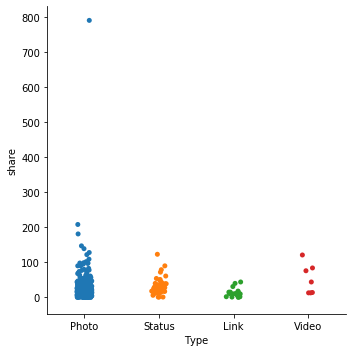

In [38]:
sns.catplot(x='Type',y='share',data=df)

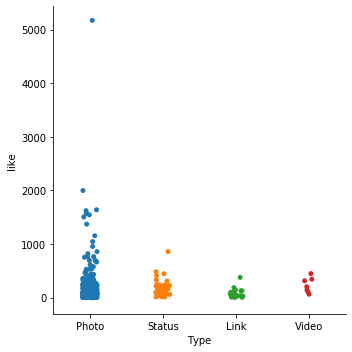

In [39]:
sns.catplot(x='Type',y='like',data=df)

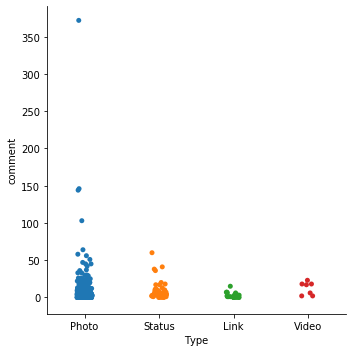

In [40]:
sns.catplot(x='Type',y='comment',data=df)

Text(0, 0.5, 'Y Data')

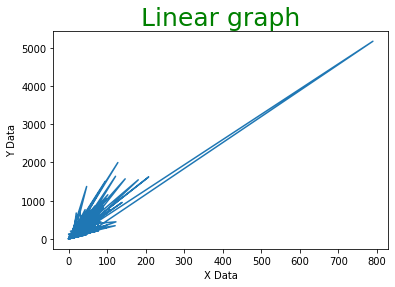

In [42]:
x=df['share']
y=df['like']
plt.plot(x,y)

plt.title("Linear graph", fontsize =25, color="green")


plt.xlabel("X Data")
plt.ylabel("Y Data")

In [45]:
df1=pd.read_csv("AirQuality.csv",encoding='cp1252')

C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
df1 = df1.drop(['stn_code','agency', 'location_monitoring_station'],axis=1)   

In [47]:
df1 = df1.dropna(subset=['date'])

In [49]:
COLS = ['so2','no2', 'rspm', 'spm', 'pm2_5']

In [50]:
df1.isna().sum()

sampling_date         0
state                 0
location              0
type               5390
so2               34643
no2               16230
rspm              40219
spm              237380
pm2_5            426421
date                  0
dtype: int64

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sampling_date  435735 non-null  object 
 1   state          435735 non-null  object 
 2   location       435735 non-null  object 
 3   type           430345 non-null  object 
 4   so2            401092 non-null  float64
 5   no2            419505 non-null  float64
 6   rspm           395516 non-null  float64
 7   spm            198355 non-null  float64
 8   pm2_5          9314 non-null    float64
 9   date           435735 non-null  object 
dtypes: float64(5), object(5)
memory usage: 36.6+ MB


In [52]:
df1 = df1.dropna(subset=['type'])
df1 = df1.dropna(subset=['so2'])
df1 = df1.dropna(subset=['no2'])
df1 = df1.dropna(subset=['rspm'])
df1 = df1.dropna(subset=['spm'])
df1 = df1.dropna(subset=['pm2_5'])

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sampling_date  0 non-null      object 
 1   state          0 non-null      object 
 2   location       0 non-null      object 
 3   type           0 non-null      object 
 4   so2            0 non-null      float64
 5   no2            0 non-null      float64
 6   rspm           0 non-null      float64
 7   spm            0 non-null      float64
 8   pm2_5          0 non-null      float64
 9   date           0 non-null      object 
dtypes: float64(5), object(5)
memory usage: 0.0+ bytes
